In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Cargar un archivo de Excel

df_excel = pd.read_csv("supermarket_sales - Sheet1.csv")


# Mostrar las primeras filas del DataFrame
print(df_excel.head(5))

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [ ]:
selected_columns = df_excel[['Invoice ID', 'Branch', 'City', 'Total']]
print(selected_columns.head())

In [7]:
print(df_excel.dtypes)

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [8]:
nan_counts = df_excel.isna().sum()
print(nan_counts)

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [50]:
# Descriptiva para columnas numericas
var_numericas=df_excel.select_dtypes(include=[np.number])
var_numericas.describe().round(2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Month
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97,1.99
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72,0.84
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00,1.00
25%,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50,1.00
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00,2.00
75%,77.94,8.00,22.45,471.35,448.90,4.76,22.45,8.50,3.00
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00,3.00


In [51]:
# Exportar tabla descriptiva a un archivo CSV
var_numericas.describe().round(2).to_csv("tabla_descriptiva.csv", index=True)

In [54]:
# Crear una tabla con la cantidad de categorías únicas por variable cualitativa
categorias_unicas = categorias.nunique().reset_index()
categorias_unicas.columns = ['Variable', 'Cantidad de Categorías Únicas']
categorias_unicas.to_csv("tabla_descriptiva_cuali.csv", index=True)

In [12]:
# categorias en variables cualitativas
categorias = df_excel.select_dtypes(include=[object])
for col in categorias.columns:
    print(f"Categorías en {col}:")
    print(df_excel[col].value_counts())
    print()

Categorías en Invoice ID:
Invoice ID
849-09-3807    1
750-67-8428    1
226-31-3081    1
631-41-3108    1
123-19-1176    1
              ..
529-56-3974    1
365-64-0515    1
252-56-2699    1
829-34-3910    1
299-46-1805    1
Name: count, Length: 1000, dtype: int64

Categorías en Branch:
Branch
A    340
B    332
C    328
Name: count, dtype: int64

Categorías en City:
City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

Categorías en Customer type:
Customer type
Member    501
Normal    499
Name: count, dtype: int64

Categorías en Gender:
Gender
Female    501
Male      499
Name: count, dtype: int64

Categorías en Product line:
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

Categorías en Date:
Date
2/7/2019     20
2/15/2019    19
3/2/2019     18
1/8/2019     18
3/14/2019    18
             .

In [15]:
# graficos
## tendencia
df_excel['Date'] = pd.to_datetime(df_excel['Date'])
df_excel['Month'] = df_excel['Date'].dt.month


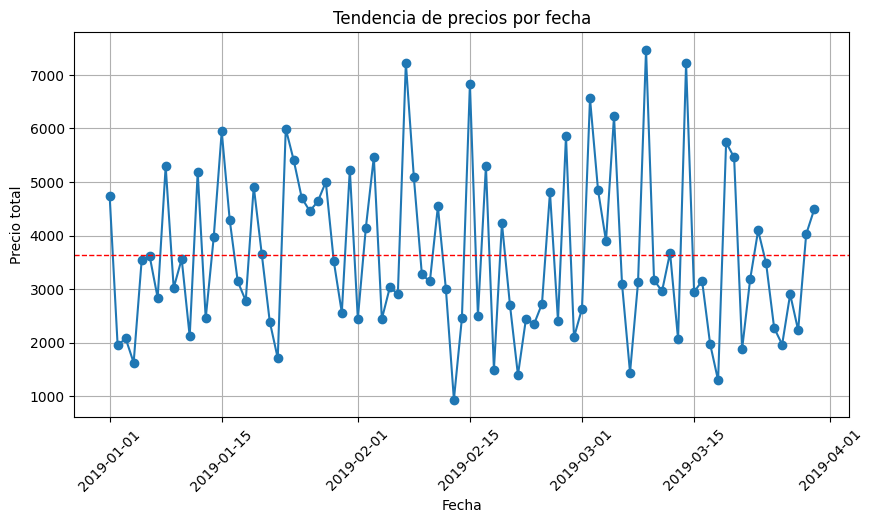

In [ ]:
df_resumen=df_excel.groupby('Date')['Total'].sum().reset_index()
# grafico de la tendencia
plt.figure(figsize=(10, 5)) 
plt.plot(df_resumen['Date'], df_resumen['Total'], marker='o', linestyle='-')
plt.title('Tendencia de precios por fecha')
plt.xlabel('Fecha')
plt.ylabel('Precio total')
plt.axhline(y=df_resumen["Total"].mean(), color='r', linestyle='--', lw=1,xmin=0, xmax=1)
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [63]:
print("El precio promedio es: ", df_resumen["Total"].mean())

El precio promedio es:  3628.8398764044937


In [64]:
plt.figure(figsize=(12, 6))

# Filtrar por cada tipo de cliente y graficar
for customer_type, group in df_resumen.groupby('Customer type'):
    plt.plot(group['Date'], group['Total'], marker='o', label=customer_type)

plt.title('Tendencia de Unit Price por Customer Type')
plt.xlabel('Fecha')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.axhline(y=df_resumen["Total"].mean(), color='r', linestyle='--', lw=1,xmin=0, xmax=1)
plt.legend(title='Customer Type')
plt.grid()
plt.show()

KeyError: 'Customer type'

<Figure size 1200x600 with 0 Axes>

<Axes: title={'center': 'Cantidad de productos vendidos por Product Line'}, ylabel='Quantity'>

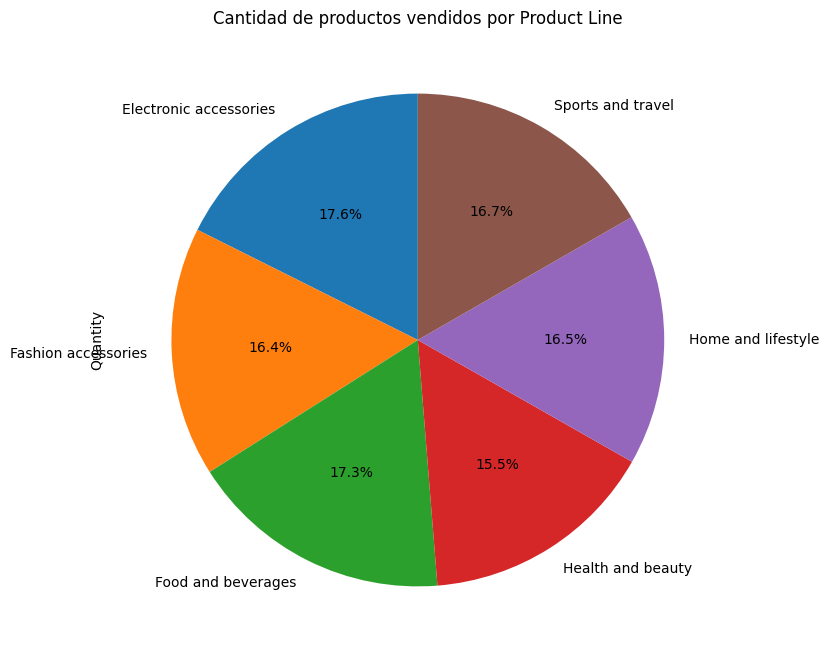

In [47]:
# df_excel.groupby('Product line')['Quantity'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8),  title='Cantidad de productos vendidos por Product Line')

In [49]:
# Crear una tabla con los tipos de datos de cada columna
tabla_tipos_datos = pd.DataFrame({'Columna': df_excel.columns, 'Tipo de dato': df_excel.dtypes})
tabla_tipos_datos

,Columna,Tipo de dato
Invoice ID,Invoice ID,object
Branch,Branch,object
City,City,object
Customer type,Customer type,object
Gender,Gender,object
Product line,Product line,object
Unit price,Unit price,float64
Quantity,Quantity,int64
Tax 5%,Tax 5%,float64
Total,Total,float64


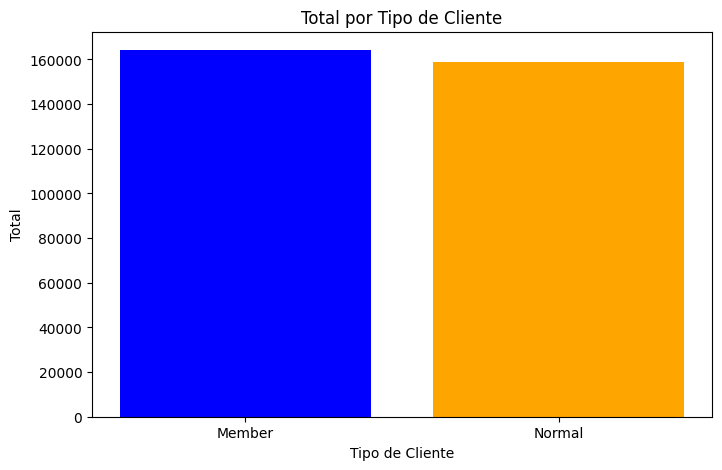

In [55]:
# Agrupar por tipo de cliente y sumar el total
totales_por_cliente = df_excel.groupby('Customer type')['Total'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(totales_por_cliente['Customer type'], totales_por_cliente['Total'], color=['blue', 'orange'])
plt.title('Total por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Total')
plt.show()

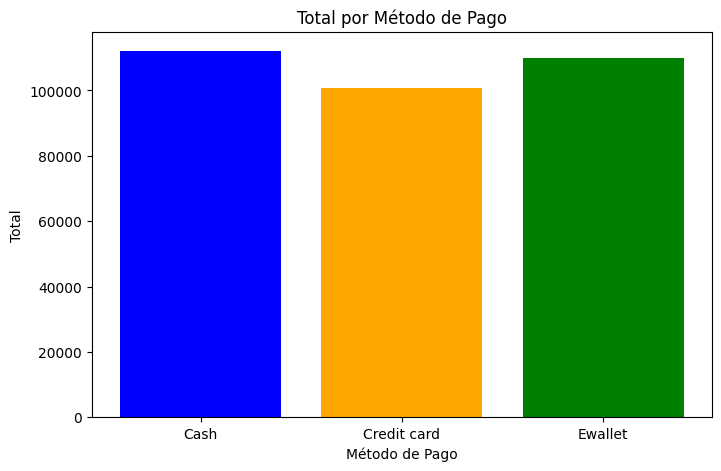

In [56]:
# Agrupar por método de pago y sumar el total
totales_por_metodo_pago = df_excel.groupby('Payment')['Total'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(totales_por_metodo_pago['Payment'], totales_por_metodo_pago['Total'], color=['blue', 'orange', 'green'])
plt.title('Total por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Total')
plt.show()

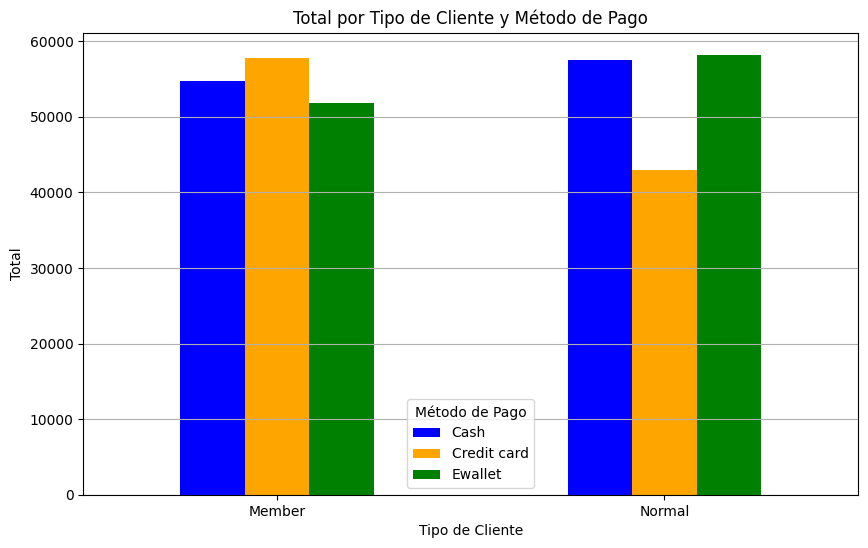

In [57]:
# Agrupar por tipo de cliente y método de pago, y sumar el total
totales_por_cliente_y_pago = df_excel.groupby(['Customer type', 'Payment'])['Total'].sum().unstack()

# Crear el gráfico de barras
totales_por_cliente_y_pago.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange', 'green'])
plt.title('Total por Tipo de Cliente y Método de Pago')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Total')
plt.xticks(rotation=0)
plt.legend(title='Método de Pago')
plt.grid(axis='y')
plt.show()